# This notebook will focus on outputting a regression model regarding the Boston house-price data hosted on tensorflow
- Download the model from tfds
- Explore the dataset
- Build a baseline using sklearn
- Beat the baseline using Tensorflow
- Follow a VGG architecture for the next model
- EXTRA: Try reinforced learning

In [76]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [3]:
# The data used will be taken from tfds
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113)

65536/57026 [==================================] - 0s 0us/step


# Explore the dataset
The link to the official dataset can be found here: http://lib.stat.cmu.edu/datasets/boston

Variables in order:
- CRIM:     per capita crime rate by town
- ZN   :    proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS :   proportion of non-retail business acres per town
- CHAS  :   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX    :  nitric oxides concentration (parts per 10 million)
- RM      : average number of rooms per dwelling
- AGE     : proportion of owner-occupied units built prior to 1940
- DIS     : weighted distances to five Boston employment centres
- RAD     : index of accessibility to radial highways
- TAX     : :full value property tax rate per 10,000 USD
- PTRATIO : pupil teacher ratio by town
- B      :  1000(Bk - 0.63)^2 where: Bk is the proportion of blacks by town
- LSTAT  :  % lower status of the population
- MEDV   :  Median value of owner occupied homes in $1000's

In [4]:
# The dataset appears to be standardized and preprocessed for quick use!
X_train[:5], X_train.shape, y_train.shape, X_test.shape, y_test.shape

(array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
         6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
         2.10000e+01, 3.96900e+02, 1.87200e+01],
        [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
         7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
         1.47000e+01, 3.95380e+02, 3.11000e+00],
        [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
         4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
         2.02000e+01, 3.75520e+02, 3.26000e+00],
        [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
         6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
         2.02000e+01, 3.96900e+02, 8.01000e+00],
        [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
         6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
         2.02000e+01, 3.91430e+02, 1.46500e+01]]),
 (404, 13),
 

### The dataset from tensorflow appears to be preprocessed and ready to be fed to the machine learning model

# Build model_0: The baseline
- Use sklearn's linear regression function
- Evaluate the model using any metric function from sklearn
- Visualize the data to better understand the output

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse 

model_0 = LinearRegression()

# Fit the model
model_0.fit(X_train, y_train)

# Evaluate the model
model_0_preds = model_0.predict(X_test)
print(f"Mean Squared Error (MSE): {mse(y_test, model_0_preds):.2f} \
\nR2 score (Coefficient of Determination): {model_0.score(X_test, y_test):.2f}")

Mean Squared Error (MSE): 23.20 
R2 score (Coefficient of Determination): 0.72


## Visualize the predicted result against the actual y_values 

In [6]:
model_0_preds.shape, y_test.shape

((102,), (102,))

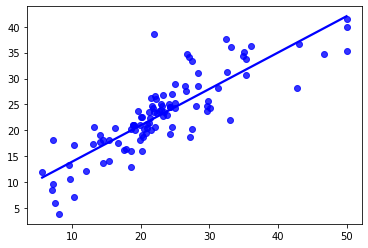

In [7]:
# Plot the y_test vs the y_pred
import seaborn as sns
sns.regplot(x=y_test, y=model_0_preds, ci=None, color="b")

In [16]:
def pred_plot(y_preds, y_test=y_test):
  sns.regplot(x=y_test, y=y_preds, ci=None, color="b")

# Model_1: Building a simple regression model using tensorflow

In [47]:
# Set the random seed
tf.random.set_seed = 42

# Create the model
model_1 = tf.keras.Sequential([
                             layers.Dense(130, activation="relu"),
                             layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Build the model
history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=500,
                        verbose=0)

In [48]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 83.6925 - mse: 83.6925


[83.6925048828125, 83.6925048828125]

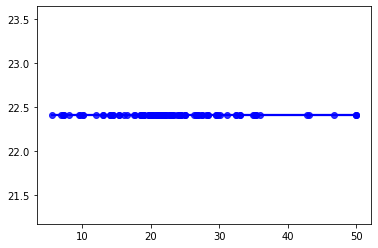

In [49]:
model_1_preds = model_1.predict(X_test)
pred_plot(model_1_preds, y_test)

In [50]:
model_1_preds[:10]

array([[22.408613],
       [22.408613],
       [22.408613],
       [22.408613],
       [22.408613],
       [22.408613],
       [22.408613],
       [22.408613],
       [22.408613],
       [22.408613]], dtype=float32)

The model doesn't seem to be doing well. Try fixing that in the next model

# Model_2: Building a simple regression model with adjusted parameters

In [70]:
# Set the random seed
tf.random.set_seed = 42

# Create the model
model_2 = tf.keras.Sequential([
                             layers.Dense(130, activation="relu"),
                             layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mse"])

# Build the model
history_2 = model_2.fit(X_train,
                        y_train,
                        epochs=150,
                        verbose=0)

In [71]:
# Evaluate the model
model_2.evaluate(X_test, y_test), mse(y_test, model_0_preds)

4/4 [==============================] - 0s 3ms/step - loss: 25.1010 - mse: 25.1010


([25.100971221923828, 25.100971221923828], 23.195599256422906)

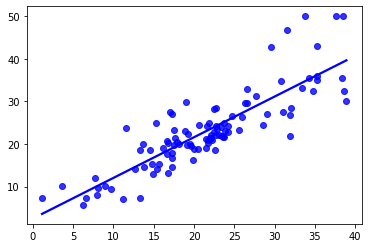

In [115]:
model_2_preds = model_2.predict(X_test)
pred_plot(y_test, model_2_preds)

In [87]:
def plot_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  mse = history.history['mse']
  epochs = range(len(history.history['loss']))
  
  # The loss is mse in this case
  # # Plot loss
  # plt.plot(epochs, loss, label='loss')
  # plt.title('Loss')
  # plt.xlabel('Epochs')
  # plt.legend()

  # Plot mse
  plt.figure()
  plt.plot(epochs, mse, label='mse')
  plt.title('MSE')
  plt.xlabel('Epochs')
  plt.legend()

The model appears to be performing much better using the Adam optimizer. However, it is time to make a slightly more complex model.

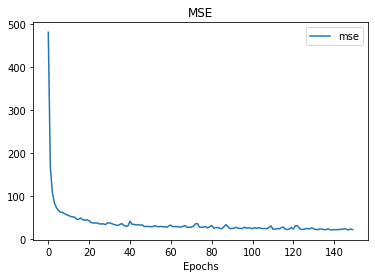

In [88]:
plot_curves(history_2)

# Model_3: Building a more complex model

In [184]:
# Set the random seed
tf.random.set_seed = 42

# Create the model
model_3 = tf.keras.Sequential([
                             layers.Dense(130, activation="relu"),
                             layers.Dense(130, activation="relu"),
                             layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mse"])

# Build the model
history_3 = model_3.fit(X_train,
                        y_train,
                        epochs=150,
                        verbose=0)

In [185]:
# Evaluate the model
model_3.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 33.7120 - mse: 33.7120


[33.712005615234375, 33.712005615234375]

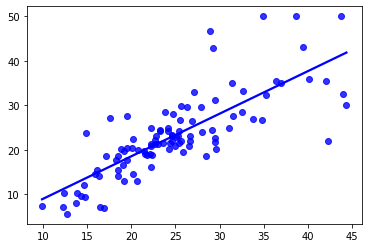

In [186]:
model_3_preds = model_3.predict(X_test)
pred_plot(y_test, model_3_preds)

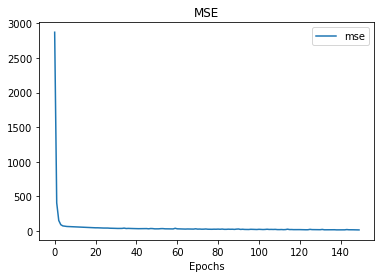

In [187]:
plot_curves(history_3)